### Generational Population Simulator
#### Alissa Trujillo

In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random

**Defining the Game**

Due to the unique nature of Side Blotched Lizards mating habits, the game that results from their mating strategies is zero-sum. 

There are three color variations of the lizard: orange, yellow and blue. In addition to the visual differences, there are also inherent personality differences that lead to differed mating strategies.

The orange lizards are very assertive and typically will covet harems of female lizards. This makes them strictly dominant over the blue variants who mate monogamously. The yellow males, however, strictly dominate the orange lizards. The yellow variation is able to "fit in" so to speak better with female lizards, and are able to sneak into territory of orange lizards and steal mates from their harems. Since the blue lizards are always with their one mate, assuming they are able to procure one, they will be able to fend off the yellow intruders. This allows the blue lizards to strictly dominate their yellow-colored counterparts.

In [2]:
orange = [[1,1], [2,0], [0,2]]
yellow = [[0,2], [1,1], [2,0]]
blue = [[2,0], [0,2], [1,1]]

payoff_matrix = pd.DataFrame(list(zip(orange, yellow, blue)), 
                             index=['orange', 'yellow', 'blue'],
                             columns=['orange', 'yellow', 'blue'])

In [3]:
payoff_matrix

,orange,yellow,blue
orange,"[1, 1]","[0, 2]","[2, 0]"
yellow,"[2, 0]","[1, 1]","[0, 2]"
blue,"[0, 2]","[2, 0]","[1, 1]"


**Creating the Simulation**

We are now going to create a function that simulates mating according to the above payoffs. We will begin with an even number of each coloration, and will assume that the male to female ratio is 1:1 for simplicity. 

We will also assume, due to random mutations that there will always be at least a 2% population of each species, denoted below as the "floor". We will also assume due to environmental constraints, there will never be a population of one coloration that exceeds the initial total population.

In [140]:
def simulate_pop(pop, gen, o=1/3, y=1/3, b=1/3):
    pop_df = pd.DataFrame(columns = ['NewGenPopulation', 'NewGenOrange', 'NewGenYellow', 'NewGenBlue', 
           'TotalPop', 'TotalOrange', 'TotalYellow', 'TotalBlue',
           'ShareOrange', 'ShareYellow', 'ShareBlue', 'BestStrategy'])
    
    initial_pop = pop
    
    grandparent_pop = 0
    parent_pop = 0
    current_pop = pop
    
    grandparent_breakdown = [0,0,0]
    parent_breakdown = [0,0,0]
    current_breakdown = [pop*o,pop*y,pop*b]
    
    for i in range(gen):
        
        starting_pop = grandparent_pop + parent_pop + current_pop
        
        o_pop = round(o*pop)
        y_pop = round(y*pop)
        b_pop = round(b*pop)
            
        nextgen_o = 0
        o_ceiling = min([o_pop, initial_pop])
        o_floor = max([o_ceiling, round(0.02*pop)])
    
        for i in range(o_floor):
            x = random.choices([1,0,2], weights=(o,y,b), k=1)
            nextgen_o += x[0]
        
        nextgen_y = 0
        y_ceiling = min([y_pop, initial_pop])
        y_floor = max([y_ceiling, round(0.02*pop)])
    
        for i in range(y_floor):
            x = random.choices([2,1,0], weights=(o,y,b), k=1)
            nextgen_y += x[0]
        
        nextgen_b = 0
        b_ceiling = min([b_pop, initial_pop])
        b_floor = max([b_ceiling, round(0.02*pop)])
    
        for i in range(b_floor):
            x = random.choices([0,2,1], weights=(o,y,b), k=1)
            nextgen_b += x[0]
        
        grandparent_breakdown = parent_breakdown
        parent_breakdown = current_breakdown
        current_breakdown = [nextgen_o, nextgen_y, nextgen_b]
            
        grandparent_pop = parent_pop
        parent_pop = current_pop
        current_pop = nextgen_o + nextgen_y + nextgen_b
        pop = current_pop
        
        total_pop = grandparent_pop + parent_pop + current_pop
        
        total_o = grandparent_breakdown[0] + parent_breakdown[0] + current_breakdown[0]
        total_y = grandparent_breakdown[1] + parent_breakdown[1] + current_breakdown[1]
        total_b = grandparent_breakdown[2] + parent_breakdown[2] + current_breakdown[2]
        
        share_o = total_o/total_pop
        share_y = total_y/total_pop
        share_b = total_b/total_pop
        
        o = share_o
        y = share_y
        b = share_b
        
        if max(current_breakdown) == nextgen_o:
            best_strategy = 'Orange'
        elif max(current_breakdown) == nextgen_y:
            best_strategy = 'Yellow'
        else:
            best_strategy = 'Blue'
        
        row = [current_pop, nextgen_o, nextgen_y, nextgen_b,
               total_pop, total_o, total_y, total_b,
               share_o, share_y, share_b, best_strategy]
        
        pop_df.loc[len(pop_df.index)] = row
    
    return(pop_df)

In [141]:
sim = simulate_pop(3000,1000)

In [142]:
sim

,NewGenPopulation,NewGenOrange,NewGenYellow,NewGenBlue,TotalPop,TotalOrange,TotalYellow,TotalBlue,ShareOrange,ShareYellow,ShareBlue,BestStrategy
0,2972,1002,1011,959,5972,2002.0,2011.0,1959.0,0.335231,0.336738,0.328031,Yellow
1,3027,1025,1027,975,8999,3027.0,3038.0,2934.0,0.336371,0.337593,0.326036,Yellow
2,3011,991,1029,991,9010,3018.0,3067.0,2925.0,0.334961,0.340400,0.324639,Yellow
3,3037,1029,1040,968,9075,3045.0,3096.0,2934.0,0.335537,0.341157,0.323306,Yellow
4,2988,1002,1009,977,9036,3022.0,3078.0,2936.0,0.334440,0.340637,0.324923,Yellow
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3223,7,2948,268,9903,99.0,9193.0,611.0,0.009997,0.928305,0.061698,Yellow
996,3238,6,2848,384,9739,33.0,8851.0,855.0,0.003388,0.908820,0.087791,Yellow
997,3228,14,2668,546,9689,27.0,8464.0,1198.0,0.002787,0.873568,0.123645,Yellow
998,3247,22,2499,726,9713,42.0,8015.0,1656.0,0.004324,0.825183,0.170493,Yellow


In [145]:
pop = sim[['TotalOrange', 'TotalYellow', 'TotalBlue']]
pop_slice = pop.iloc[300:500]

<Axes: >

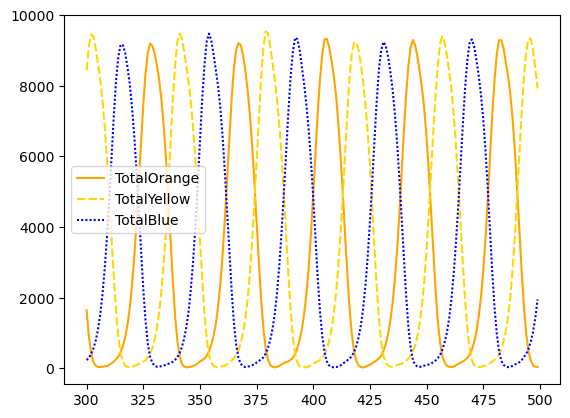

In [150]:
sns.lineplot(data=pop_slice, palette=['orange', 'gold', 'blue'])